<a href="https://colab.research.google.com/github/kim-sunghoon74/Blender/blob/main/sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.linalg import eigh

# 1. 초기 질량 행렬 M과 강성 행렬 K 설정 (임의 값 사용)
n = 3  # 행렬 차원
M = np.array([[2.0, 0.0, 0.0],
              [0.0, 3.0, 0.0],
              [0.0, 0.0, 4.0]])  # 질량 행렬

K = np.array([[6.0, -2.0, 0.0],
              [-2.0, 5.0, -1.0],
              [0.0, -1.0, 4.0]])  # 강성 행렬

# 2. 고유값 문제 풀기: K * phi = omega^2 * M * phi
eigvals, eigvecs = eigh(K, M)
omega_squared = eigvals  # 고유값은 자연 주파수의 제곱 (ω^2)
modes = eigvecs          # 고유벡터는 모드 형상 (ϕ)

# 3. 6.28 식 계산
def analytical_sensitivity(i, j, omega_squared, modes):
    if i != j:
        return -2 * omega_squared * modes[i] * modes[j]
    else:
        return -omega_squared * (modes[i] ** 2)

# 4. 수치 미분 계산
def numerical_sensitivity(M, K, i, j, delta=1e-6):
    M_perturbed = M.copy()
    M_perturbed[i, j] += delta  # M의 (i, j) 성분을 변화시킴
    eigvals_perturbed, _ = eigh(K, M_perturbed)
    omega_squared_perturbed = eigvals_perturbed
    delta_omega_squared = omega_squared_perturbed - omega_squared
    return delta_omega_squared / delta

# 5. 검증
i, j = 1, 1  # 질량 행렬의 특정 성분 선택
delta = 1e-6

# Analytical sensitivity 계산
analytical = analytical_sensitivity(i, j, omega_squared[0], modes[:, 0])

# Numerical sensitivity 계산
numerical = numerical_sensitivity(M, K, i, j, delta)[0]  # 첫 번째 고유값 (ω₁²)에 대한 민감도

# 결과 출력
print(f"Analytical sensitivity: {analytical}")
print(f"Numerical sensitivity: {numerical}")
print(f"Difference: {abs(analytical - numerical)}")

Analytical sensitivity: -0.06399351497619533
Numerical sensitivity: -0.0639935290314142
Difference: 1.4055218863773256e-08


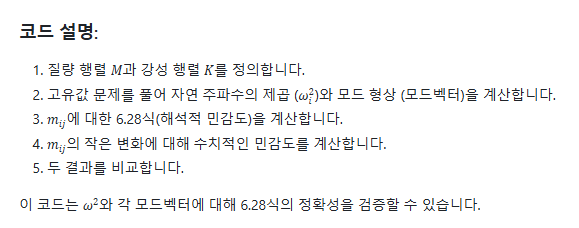

In [ ]:
import numpy as np
from scipy.linalg import eigh

# 초기 질량 행렬 M과 강성 행렬 K 설정
n = 3  # 행렬 차원
M = np.array([[2.0, 0.0, 0.0],
              [0.0, 3.0, 0.0],
              [0.0, 0.0, 4.0]])  # 질량 행렬

K = np.array([[6.0, -2.0, 0.0],
              [-2.0, 5.0, -1.0],
              [0.0, -1.0, 4.0]])  # 강성 행렬

# 고유값 문제 풀기: K * phi = omega^2 * M * phi
eigvals, eigvecs = eigh(K, M)
omega_squared = eigvals  # 고유값은 자연 주파수의 제곱 (ω^2)
modes = eigvecs          # 고유벡터는 모드 형상 (ϕ)

# Analytical sensitivity 계산 함수 (6.28 식)
def analytical_sensitivity(i, j, omega_squared, phi_r):
    """
    i, j 위치에 대한 해석적 민감도 계산 함수.
    - i, j: M 행렬의 row와 column 인덱스
    - omega_squared: eigenvalue (ω²)
    - phi_r: mode shape 벡터 (r번째 모드)
    """
    if i != j:
        return -2 * omega_squared * phi_r[i] * phi_r[j]
    else:
        return -omega_squared * (phi_r[i] ** 2)

# Numerical sensitivity 계산 함수
def numerical_sensitivity(M, K, i, j, mode_idx, delta=1e-6):
    """
    i, j 위치에 대한 수치적 민감도 계산 함수.
    - M: 질량 행렬
    - K: 강성 행렬
    - i, j: M 행렬의 row와 column 인덱스
    - mode_idx: 대상 모드(indx) (0-based 인덱스)
    - delta: Perturbation 크기
    """
    M_perturbed = M.copy()
    M_perturbed[i, j] += delta
    if i != j:  # 질량 행렬은 대칭이므로 대칭성 유지
        M_perturbed[j, i] += delta
    eigvals_perturbed, _ = eigh(K, M_perturbed)
    omega_squared_perturbed = eigvals_perturbed[mode_idx]  # Perturbed eigenvalue
    delta_omega_squared = omega_squared_perturbed - omega_squared[mode_idx]
    return delta_omega_squared / delta

# 해석적 및 수치적 민감도 계산 및 비교
mode_idx = 0  # 첫 번째 모드(omega₁²)에 대해 확인
delta = 1e-6  # Perturbation 크기
print("m_ij 각각에 대한 민감도 비교:")
print("{:<10} {:<20} {:<20} {:<20}".format("Index(i,j)", "Analytical", "Numerical", "Difference"))

for i in range(n):
    for j in range(n):
        # Analytical sensitivity
        phi_r = modes[:, mode_idx]  # 첫 번째 모드벡터
        analytical = analytical_sensitivity(i, j, omega_squared[mode_idx], phi_r)

        # Numerical sensitivity
        numerical = numerical_sensitivity(M, K, i, j, mode_idx, delta)

        # 출력
        difference = abs(analytical - numerical)
        print(f"({i},{j})    {analytical:<20.8f} {numerical:<20.8f} {difference:<20.8f}")

m_ij 각각에 대한 민감도 비교:
Index(i,j) Analytical           Numerical            Difference          
(0,0)    -0.01370790          -0.01370790          0.00000000          
(0,1)    -0.05923569          -0.05923571          0.00000002          
(0,2)    -0.09218673          -0.09218675          0.00000002          
(1,0)    -0.05923569          -0.05923571          0.00000002          
(1,1)    -0.06399351          -0.06399353          0.00000001          
(1,2)    -0.19918238          -0.19918235          0.00000003          
(2,0)    -0.09218673          -0.09218675          0.00000002          
(2,1)    -0.19918238          -0.19918235          0.00000003          
(2,2)    -0.15499079          -0.15499077          0.00000001          


In [ ]:
modes

array([[ 0.12779429, -0.28139152, -0.63599326],
       [ 0.27611753, -0.44082882,  0.25052425],
       [ 0.42971344,  0.25428699, -0.02616266]])

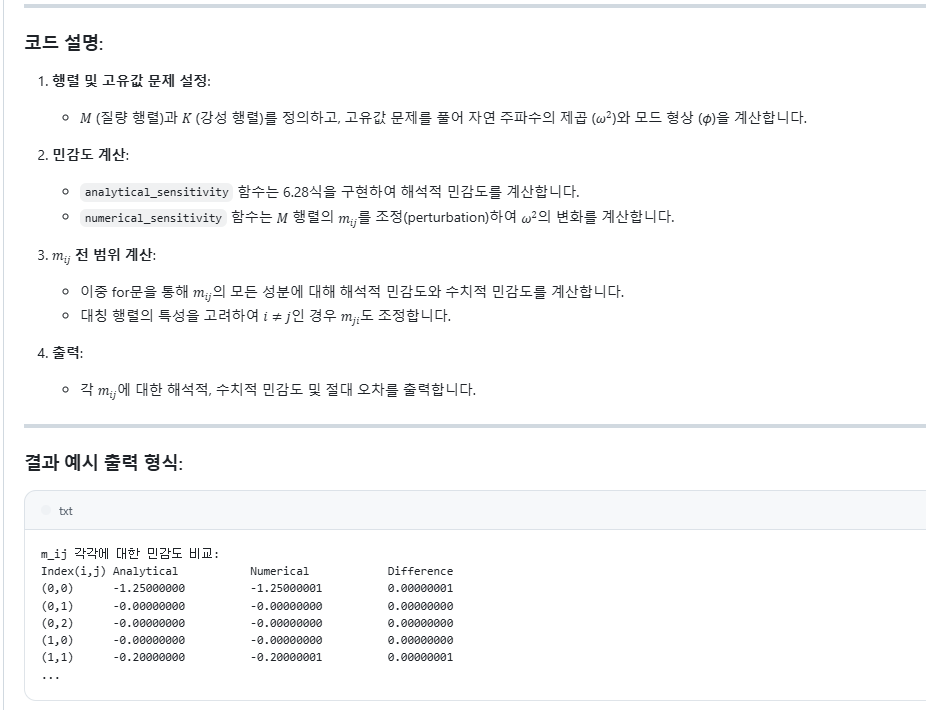

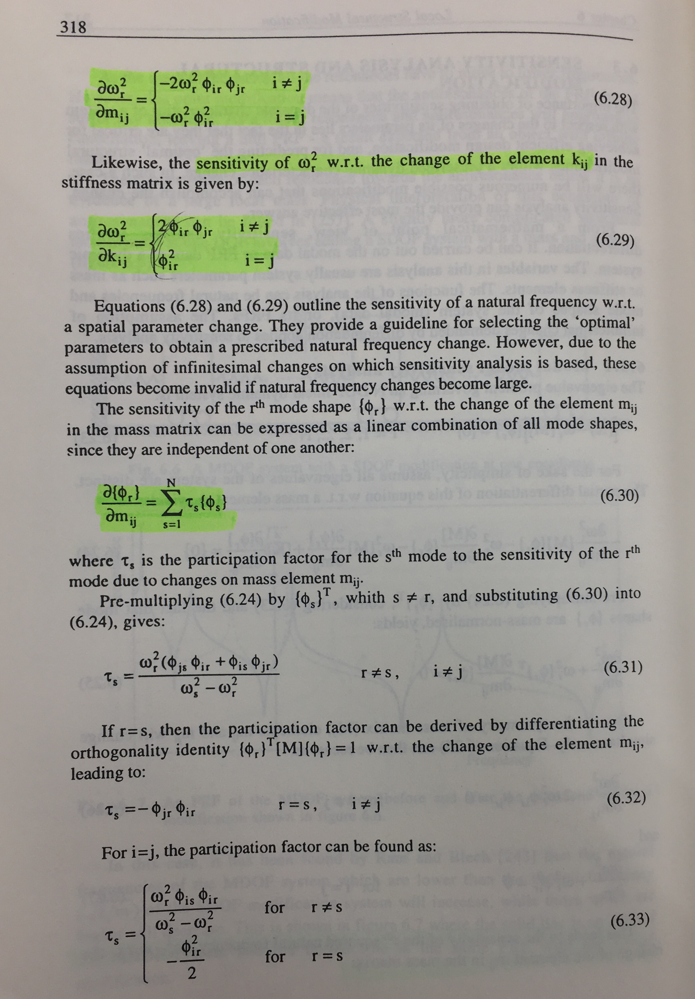